In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import numpy as np

In [2]:
import os
from PIL import Image
import numpy as np

In [3]:
x = []

In [4]:
files = os.listdir("training/background")
for i in files:
  if i != '.DS_Store':
    i = 'training/background/'+i
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(gray)

In [5]:
files = os.listdir("training/hi")
for i in files:
  if i != '.DS_Store':
    i = 'training/hi/'+i
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(gray)

In [6]:
type(x[0])

numpy.ndarray

In [7]:
len(x)

5875

In [8]:
x = np.array(x)

In [9]:
x.shape

(5875, 64, 64)

In [10]:
y = []
for i in range(0,4450):
  y.append(int(0)) #for bg
for i in range(4450,5875):
  y.append(int(1)) #for text

In [11]:
y = np.array(y)

In [12]:
y.shape

(5875,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=314)

In [14]:
x_train.shape

(4112, 64, 64)

In [15]:
y_train.shape

(4112,)

In [16]:
from google.colab.patches import cv2_imshow

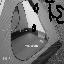

In [17]:
cv2_imshow(x_train[1])

In [18]:
y_train[1]

1

In [24]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [19]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)), #layer 1
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), #layer 2
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 3
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), #layer 4
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    # layers.Dense(80, activation='relu'), ##reducing nodes
    layers.Dense(80, activation='relu'), ##reducing nodes
    layers.Dense(30, activation='relu'), ##reducing nodes
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
opt = Adam(learning_rate=0.001)
cnn.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(x_train, y_train, epochs=50, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/50
65/65 [==============================] - 14s 211ms/step - loss: 2.0412 - accuracy: 0.6727 - val_loss: 0.6187 - val_accuracy: 0.7465
Epoch 2/50
65/65 [==============================] - 13s 204ms/step - loss: 0.5644 - accuracy: 0.7434 - val_loss: 0.5793 - val_accuracy: 0.7453
Epoch 3/50
65/65 [==============================] - 13s 203ms/step - loss: 0.5344 - accuracy: 0.7554 - val_loss: 0.5465 - val_accuracy: 0.7533
Epoch 4/50
65/65 [==============================] - 13s 203ms/step - loss: 0.4640 - accuracy: 0.7889 - val_loss: 0.4440 - val_accuracy: 0.8429
Epoch 5/50
65/65 [==============================] - 13s 203ms/step - loss: 0.3843 - accuracy: 0.8504 - val_loss: 0.4109 - val_accuracy: 0.8690
Epoch 6/50
65/65 [==============================] - 13s 203ms/step - loss: 0.3199 - accuracy: 0.8811 - val_loss: 0.3718 - val_accuracy: 0.8939
Epoch 7/50
65/65 [==============================] - 13s 203ms/step - loss: 0.2816 - accuracy: 0.9008 - val_loss: 0.3116 - val_accuracy: 0.9081

In [27]:
test_data = []
files = os.listdir("test")
for i in files:
  if i != '.DS_Store':
    i = 'test/'+i
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_data.append(gray)

In [31]:
test_data = np.array(test_data)

In [32]:
test_data.shape

(98, 64, 64)

In [33]:
test_data = test_data.reshape(-1,64,64,1)

In [37]:
test_data.shape

(98, 64, 64, 1)

In [39]:
prediction = cnn.predict(test_data)

In [41]:
y_pred = []

In [43]:
for i in prediction:
  if i <0.5:
    y_pred.append(int(0))
  else:
    y_pred.append(int(1))

In [45]:
y_pred = np.array(y_pred)

In [47]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1])